<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 1 - Introducción a Máquinas de Aprendizaje </H3>
<hr style="height:2px;border:none"/>
<H3 align='center'> Ignacio Pinedo </H3>

## 1. Aprendizaje con regresión lineal.
>a) Cargue los datos a analizar, descargándolos desde la plataforma como se indicó, en formato dataframe pandas. Descríbalos adecuadamente, ya sea la variable dependiente o las independientes, si es que lo son.


In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("world-university-rankings/timesData.csv")
print(df.shape)
df.head()

(2603, 14)


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


Son 2603 universidades con los siguiente atributos.
* Las variables independientes son:
    * country: Pais
    * teaching: Puntaje de enseñanza
    * international: Puntaje de perspectiva internacional
    * research: Puntaje de investigacion
    * citations: Puntaje de referencias
    * income: Puntaje de ingresos en la industria
    * num_students: Total de estudiantes
    * student_staff_ratio: Total de estudiantes dividido por el total de personal
    * international_students: Porcentaje de estudiantes extranjeros
    * female_male_ratio: Razon entre hombres y mujeres en el alumnado
    * year: Año del ranking
    
    
* Las variables dependientes son:
    * university_name: Nombre de la universidad
    * total_score: Promedio ponderado de los puntajes utilizado para determinar el ranking
    * world_rank: Ranking de la universidad 
    
    
Es importante notar que solo se trabajara con el total_score, ya que world_rank tiene la misma informacion, simplemente ordenado y university_name es solo un indicador.

>b) Debido a la estructura será necesario realizar un leve pre-proceso. Existen vacíos entre los datos o valores '-', por lo que será necesario eliminarlos (o si piensa una mejor manera de manejar ésto puede hacerlo, se verá reflejado en su nota). Además de ésto deje los datos con score unkown o '-' en un conjunto target separado, unlabeled data (éste será el objetivo del entrenamiento) ¿Cuántos datos quedan en cada conjunto? 

In [118]:
def convertToInt(x):
    try:
        x = int(x)
    except:
        x = 0
    return x
df.dropna(axis=0,inplace=True,how='any') #borra nan
df["total_score"] = df["total_score"].apply(lambda x: x.replace('-','unknown')) #rellena 
df = df[~(df == '-').any(axis=1)] #elimina filas con valores nulos

nuevo_df  = pd.get_dummies(df, columns=["country"]) #column to categorical

nuevo_df['female'] = nuevo_df['female_male_ratio'].str.split(':', expand=True)[0].apply(convertToInt)
nuevo_df['male'] = nuevo_df['female_male_ratio'].str.split(':', expand=True)[1].apply(convertToInt)
nuevo_df['female_male_ratio'] =  np.where(nuevo_df['male'] == 0, 0, nuevo_df['female']/nuevo_df['male']) #si no hay (rellena 0) 
nuevo_df['num_students'] = nuevo_df['num_students'].apply(lambda x: int(str(x).replace(',','')))
nuevo_df['international_students'] = nuevo_df['international_students'].apply(lambda x: int(str(x).replace('%','')))


df_test = nuevo_df[nuevo_df["total_score"]=='unknown']  #para predecir al final
nuevo_df =  nuevo_df[nuevo_df["total_score"]!='unknown'] #elimina unknown rank..
print(df_test.shape)
print(nuevo_df.shape)

nuevo_df.head()

0    2169
1       5
Name: country_Chile, dtype: int64
(1220, 82)
(954, 82)


,world_rank,university_name,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,...,country_Taiwan,country_Thailand,country_Turkey,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States of America,female,male
1,2,California Institute of Technology,97.7,54.6,98.0,99.9,83.7,96.0,2243,6.9,...,0,0,0,0,0,0,0,1,33,67
2,3,Massachusetts Institute of Technology,97.8,82.3,91.4,99.9,87.5,95.6,11074,9.0,...,0,0,0,0,0,0,0,1,37,63
3,4,Stanford University,98.3,29.5,98.1,99.2,64.3,94.3,15596,7.8,...,0,0,0,0,0,0,0,1,42,58
5,6,University of Cambridge,90.5,77.7,94.1,94.0,57.0,91.2,18812,11.8,...,0,0,0,0,0,0,1,0,46,54
6,6,University of Oxford,88.2,77.2,93.9,95.1,73.5,91.2,19919,11.6,...,0,0,0,0,0,0,1,0,46,54


Quedan 954 datos con los que se trabajaran y 1220 datos objetivo.

>c) Cree las matrices de cada conjunto con las que trabajará. Además de ésto separe el conjunto de pruebas fijo que se utilizará, recuerde que éste no puede ser utilizado. Si estima conveniente también cree conjunto de validación.

In [3]:
Y = nuevo_df['total_score'].values
X = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).values
Y = Y.astype('float32')
X = X.astype('float32')
X.shape
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

>d) Normalice los datos antes de trabajar. Explique la importancia/conveniencia de realizar ésto.

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Es importante normalizar los datos ya que la hace mas consistentes, elimina el sesgo, permite mejores resultados de convergencia debido a que se trabaja con la norma euclidiana.

>e) Realice una regresión lineal de mı́nimos cuadrados básica. Mida el residuo de cada predicción en cada dato y haga un gráfico de éste ¿Qué indica lo observado?

C:\Users\Ignacio\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Ignacio\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


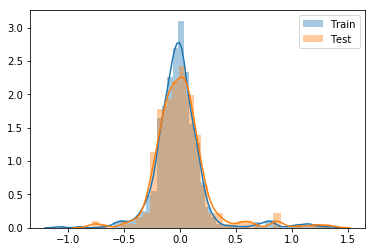

In [8]:
from sklearn.linear_model import LinearRegression as LR

import matplotlib.pyplot as plt

linreg = LR(fit_intercept=True, n_jobs=1)
linreg.fit(X_train_scaled,y_train)

import seaborn as sns
res_train = y_train-linreg.predict(X_train_scaled)
res_test = y_test-linreg.predict(X_test_scaled)
sns.distplot(res_train,hist=True,label="Train")
sns.distplot(res_test,hist=True,label="Test")
plt.legend();

Este es un grafico del la distribuccion del error, ya que los datos estan acumulados en el 0, entre \[-0.5,0.5\] aproximadamente, se concluye que se modela correctamente el ranking. A pesar que paresca visualmente una distribucion normal, se necesita hacer un test normalidad para confirmarlo. 

>f) Construya una tabla con los pesos, Z-score y F-score correspondientes a cada predictor (variable), compare estos valores. ¿Qué sucede si hacemos un raking de los atributos en base al peso obtenido en la regresión? Compare y comente ¿Qué variables están más correlacionadas con la respuesta? Si usáramos un nivel de significación del 5%. ¿Qué es lo que observa y cuál puede ser la causa?

In [130]:
from scipy import stats
from sklearn import feature_selection
linreg.score(X_train_scaled,y_train)

f_test=feature_selection.f_regression( X_train_scaled, y_train)


C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Ignacio\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Ignacio\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Ignacio\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


>g) Calcule la información mútua de los distintos predictores (variables) con respecto a la variable output o target. Comente con lo calculado anteriormente y se le parece razonable.

In [131]:
from sklearn.feature_selection import mutual_info_regression
minfo_predictor = mutual_info_regression(X_train_scaled,y_train)
minfo_predictor /=max(minfo_predictor)


>h) Construya una función que implemente Forward Step-wise Selection (FSS). Es decir, partiendo con un modelo sin predictores (variables), agregue un predictor a la vez, re-ajustando el modelo de regresión en cada paso. Para seleccionar localmente una variable, proponga/implemente un criterio distinto al utilizado en el código de ejemplo. Construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del número de variables en el modelo. Ordene el eje x de menor a mayor.

['teaching', 'citations', 'research', 'international']


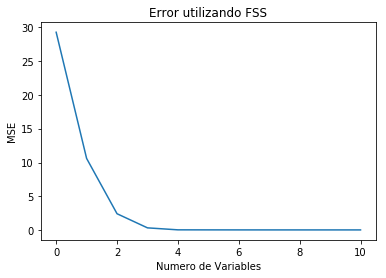

In [49]:
def fss(x, y, names_x, k = 100):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = []
    current_score = best_new_score = 0.0
    hist=[]
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = LR(fit_intercept=True, n_jobs=1)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        hist.append(best_new_score)
        
    return selected, hist
names_regressors = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).columns


k=10
selected,hist=fss(X_train_scaled,y_train,names_regressors,k=k)

plt.title("Error utilizando FSS")
plt.xlabel("Numero de Variables")
plt.ylabel("MSE")
plt.plot(range(k+1),hist, label='Regresion Logistica')

print(
[list(nuevo_df.drop(["total_score","world_rank","university_name"],axis=1))[index] for index in selected[:4]])

Se aprecia que el error se reduce a medida que se aumenta el numero de variables, llegando a un limite para 4 variables, estas son Teaching, Research, International, lo que es de esperarse.

>i) Ajuste un modelo lineal utilizando “Ridge Regression”, es decir, regularizando con la norma $\mathcal{l}_2$. Utilice valores del parámetro de regularización $\lambda$ en el rango $[10^0,10^6]$, variando si estima conveniente. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Deje un gráfico sólo para analizar los coeficientes de los países. Describa lo que observa.

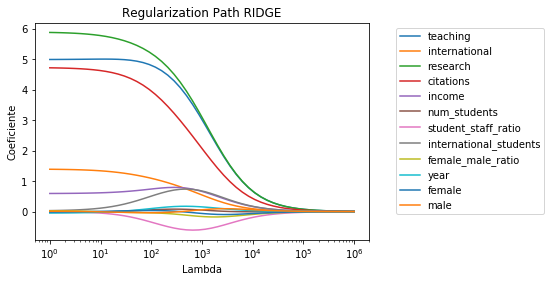

In [80]:
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt


names_regressors = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).columns
alphas_ = np.logspace(0,6,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')

for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_train_scaled, y_train)
    coefs.append(model.coef_)
ax = plt.gca()

for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    if "country" not in label:
        plt.plot(alphas_, y_arr, label=label)
ax.set_xscale('log')
plt.ylabel("Coeficiente")
plt.xlabel("Lambda")
plt.title('Regularization Path RIDGE')
plt.legend(loc=9, bbox_to_anchor=(1.3, 1))
plt.show()



malo: country_Japan
bueno: country_United States of America


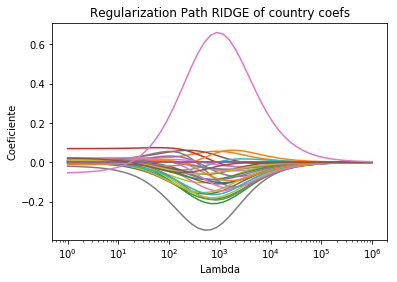

In [82]:
ax = plt.gca()

for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    if "country" in label:
        plt.plot(alphas_, y_arr, label=label)
        if min(y_arr)<-0.26:
            print("malo:",label)
        if max(y_arr)>0.2:
            print("bueno:",label)
        
ax.set_xscale('log')
plt.ylabel("Coeficiente")
plt.xlabel("Lambda")
plt.title('Regularization Path RIDGE of country coefs')
plt.show()

Para el caso de las variables no categoricas, se aprecia que a medida que se aumenta el valor de lambda el coeficiente de estas empieza a reducirse, es decir, lambda castiga la importancia de las variables. Sin embargo, para valores entre $10^1$ y $10^5$ aparecen otras variables con valores lejanos al 0 en sus coeficientes, esto es, tienen una mayor significaciancia. De todos modos, teaching, research y citations dominan al resto en todo el espacio.

Por otro lado, en el caso de las variables categoricas de los paises, los coeficientes tienen valores cercanos al 0 para lambdas altos y bajos, pero en el area de interes entre $10^1$ y $10^5$ aparecen dos curvas de interes, la de Japon y EEUU, que son el minimo y el maximo respectivamente de todas las curvas. Se concluye que el hecho que la universidad sea de Japon o EEUU implica que hay una alta significancia en el ranking de esta.

>j) Ajuste un modelo lineal utilizando el método “Lasso”, es decir, regularizando con la norma l1l1. Utilice valores del parámetro de regularización $\lambda$ en el rango $[10^2,10^3]$. Para obtener el código, modifique el ejemplo anterior. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa. ¿Es más efectivo Lasso para seleccionar atributos?

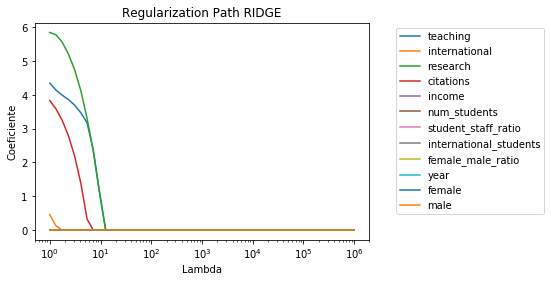

In [90]:
from sklearn.linear_model import Lasso


names_regressors = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).columns
alphas_ = np.logspace(0,6,base=10)
coefs = []
model = Lasso(fit_intercept=True)

for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_train_scaled, y_train)
    coefs.append(model.coef_)
ax = plt.gca()

for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    if "country" not in label:
        plt.plot(alphas_, y_arr, label=label)
ax.set_xscale('log')
plt.ylabel("Coeficiente")
plt.xlabel("Lambda")
plt.title('Regularization Path RIDGE')
plt.legend(loc=9, bbox_to_anchor=(1.3, 1))
plt.show()


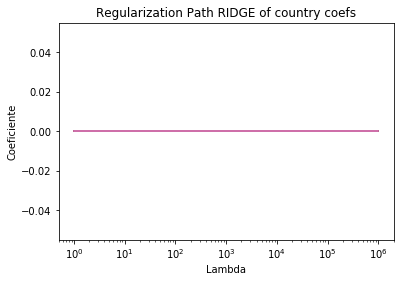

In [92]:
ax = plt.gca()

for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    if "country" in label:
        plt.plot(alphas_, y_arr, label=label)
ax.set_xscale('log')
plt.ylabel("Coeficiente")
plt.xlabel("Lambda")
plt.title('Regularization Path RIDGE of country coefs')
plt.show()

Para las variables no categoricas se puede discriminar la significancia de estas para valores de $\lambda$ extremadamente pequeños, menores 10, en este caso se concluye lo mismo que antes, que teaching, research y citations son las variables mas significativas.

Para las variables categoricas, no se puede discernir ya que todas tienen coeficientes nulos, se concluye que el metodo Lasso es una peor herramienta de seleccion de atributos que el metodo Ridge.

>k) Escogiendo uno de los dos métodos regularizadores anteriores, especificando el porqué, construya un gráfico que muestre el error de entrenamiento y el de pruebas como función del parámetro de regularización. Discuta lo que observa.

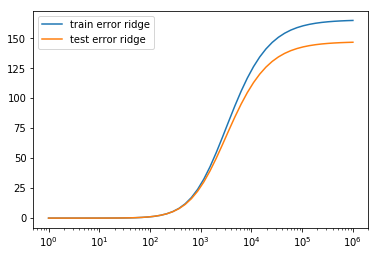

In [88]:
alphas_ = np.logspace(0,6,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_train_scaled, y_train)
    yhat_train = model.predict(X_train_scaled)
    yhat_test = model.predict(X_test_scaled)
    mse_train.append(np.mean(np.power(yhat_train - y_train, 2)))
    mse_test.append(np.mean(np.power(yhat_test - y_test, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend(loc="best")
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.show()

Se utiliza el metodo Ridge ya que fue el que tuvo mejores resultados en el punto anterior. El error tiene el comportamiento esperado, ya que para lambda muy grande, todos los coeficientes son nulos, por lo tanto $n\cdot mse=||\hat{y}-y||_2^2=||y||_2^2$, donde $y$ son los datos reales y $\hat{y}$ los datos predichos. De lo anterior, el $mse$ va a tender a la norma de los datos reales, lo que explica el comportamiento del grafico.

>l) Estime el valor del parámetro de regularización en alguno de los modelos anteriores haciendo uso de la técnica validación cruzada con un número de folds igual a K=5 y K=10. Recuerde que para que la estimación sea razonable, en cada configuración (fold) deberá reajustar los pesos del modelo. Mida el error real del modelo (ésto es sobre el conjunto de pruebas). Debido a la escala del error puede utilizar auxiliarmente MAE como métrica de desempeño. Compare y concluya.

In [94]:
mse_test = np.mean(np.power(yhat_test - y_test, 2))
from sklearn.model_selection import KFold
K=10
kf = KFold(n_splits=K)
mse_cv = 0
for train, val in kf.split(X_train_scaled):
    linreg = LR(fit_intercept=True, n_jobs=1)
    linreg.fit(X_train_scaled[train], y_train[train])
    yhat_kfold_val = linreg.predict(X_train_scaled[val])
    mse_fold = np.mean(np.power(yhat_kfold_val - y_train[val], 2))
    mse_cv += mse_fold
mse_cv = mse_cv / K
mae_fold = np.mean(np.abs(yhat_kfold_val - y_train[val]))

m) Con el modelo que se piense que es el mejor, en base a todo lo experimentado. Realice el ranking de las universidades del que no se tienen etiquetas (unlabeled data o target data) a través de predecir los datos que se dejaron como pruebas y ordenar su score en el dataframe.

In [119]:
alpha=10^3
model = Ridge(fit_intercept=True,solver='svd',alpha=alpha)

model.fit(X_train_scaled, y_train)
X_test = df_test.drop(["total_score","world_rank","university_name"],axis=1).values
X_test=X_test.astype('float32')

df_test["total_score"] = model.predict(X_test) #predict score
#armar un raking
df_final=pd.concat([df_test, nuevo_df])

univ_chilenas = df_final[df_final["country_Chile"]==1]
rannking_univ_ch = univ_chilenas.sort_values(by="total_score",ascending=False)
ranking = 1
for index,row in rannking_univ_ch.iterrows():
    print("%d - Institucion: %s" %(ranking,row["university_name"]))
    ranking+=1


1 - Institucion: Federico Santa María Technical University
2 - Institucion: Federico Santa María Technical University
3 - Institucion: Austral University of Chile
4 - Institucion: Pontifical Catholic University of Valparaíso
5 - Institucion: University of Santiago, Chile (USACH)


Se aprecia que, como es de esperar, nuestra universidad aparece en primer lugar (y segundo!) en el ranking de Chile. Sin embargo, no se estan contando otras universidades chilenas ya que estas venian con datos faltantes.